# BAN200 Week 05 Homework

To complete the homework you will need to modify this template by adding Python code and/or text.

Before starting the homework, make sure to save a copy of this template to your personal Google Drive. If you haven't saved your own copy, any changes you make will be lost when you close your browser window.

To submit your homework: go to "File" in the Colab menu bar > select "Download" > select "Download .ipynb". This will download a ".ipynb" file to your computer. You must submit this file.

The homework is to be completed in groups. It is due at the start of next class.

Homework is graded on the following scale:

* *100%* -- The assignment was submitted on time, any code runs without errors, and every question is answered correctly.

* *80%* -- The assignment was submitted on time, any code runs without errors, and every question is answered. Some questions may be incorrect, but the submission demonstrates an average level of effort and average level of understanding of the material.

* *60%* -- The submission demonstrates a below-average level of effort and below-average level of understanding of the material. This is the highest grade that should be given to submissions that are submitted late, have code that throws uncaught errors, or leave some questions unanswered.

* *0%* -- No assignment was submitted, or the submission demonstrates little-to-no effort and little-to-no understanding of the material.

# Email Subject Lines Data

This homework follows a case that is very similar to the one from class.

An online retailer has been testing a variety of email promotions. Each promotion offers a certain percentage savings and a different subject line. The retailer is interested in understanding how the percentage savings and subject line content are impacting open rate.

The dataset `email_subject_lines_data.txt` contains one row for each of 80 previous promotions, along with the following variables:
*  `subject_line` the email's subject line
*  `coupon_or_discount` 1 if the subject line contains the word 'coupon', 0 if it contains the word 'discount' (for the purposes of this analysis, we are going to assume the main difference between subject lines is whether the word 'coupon' or the word 'discount' was used)
*  `savings_pct` the percentage savings offered in the email subject line
*  `open_rate` the open rate of the email

# Question 1

Create a pandas dataframe from `email_subject_lines_data.txt`. You can find this file on the course website. You should download it from the course website and upload it to this VM using the tab on the left. Once you've created the dataframe, display it so you can take a look at it.

In [46]:
import pandas as pd
df = pd.read_csv ('/content/email_subject_lines_data.txt',delimiter='\t')
df

,subject_line,coupon_or_discount,savings_pct,open_rate
0,Unlock your exclusive coupon: Get 32% off now!,1,32,34
1,Savings Alert: 25% off with your special coupo...,1,25,31
2,17% off your next purchase with this coupon code!,1,17,25
3,Save 19% instantly: Your coupon awaits!,1,19,25
4,Exclusive Offer: 14% off with this coupon!,1,14,23
...,...,...,...,...
75,Take 24% Off Your Order with This Coupon!,1,24,23
76,Enjoy 13% Off: Your Special Coupon Inside!,1,13,21
77,Savings Alert: Your 15% Off Coupon Awaits!,1,15,19
78,Special Coupon: Take 28% Off Your Purchase!,1,28,31


# Question 2

Create a scatterplot of `savings_pct` vs `open_rate`. Make sure the variable we are trying to predict is on the vertical axis.

In [45]:
import matplotlib.pyplot as plt

<Axes: xlabel='savings_pct', ylabel='open_rate'>

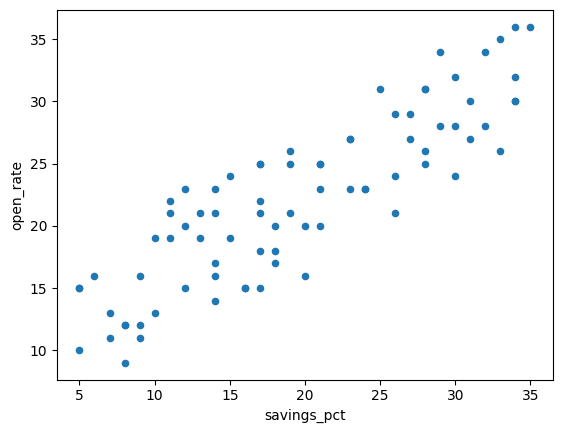

In [44]:
df.plot(kind='scatter', x='savings_pct', y='open_rate')

# Question 3

Create a numpy array called `y` that contains `open_rate`.

In [43]:
import numpy as np

In [42]:
y=df[['open_rate']].to_numpy()
y  [0:5]

array([[34],
       [31],
       [25],
       [25],
       [23]])

# Question 4

Create a numpy array called `x` that contains `savings_pct`.

In [41]:
x=df[['savings_pct']].to_numpy()
x [0:5]

array([[32],
       [25],
       [17],
       [19],
       [14]])

# Question 5

Create a keras input object with size 1. Call this object `input`.

In [29]:
import keras
import tensorflow as tf

input = keras.Input(shape=(1,))
input


<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'input_5')>

# Question 6

Creata a keras layer that takes `input` and returns a single value. Call this layer `linear_regression`.

In [32]:
linear_regression = keras.layers.Dense(1)(input)
linear_regression

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>

# Question 7



Create a keras model that takes input as the inputs and linear_regression as the outputs.


In [37]:
model = keras.Model(inputs=input, outputs=linear_regression)
model

# Question 8

Compile the model using the optimizer and loss function discused in class.

In [52]:
model.compile(optimizer='adam', loss='mean_squared_error')
model

# Question 9

Train the model on the `x` and `y` arrays defined earlier. Train for 500 epochs on a batch size of 1. Make sure to save the model history: we'll use it in the next question.

In [51]:
# Train the model
history = model.fit(x, y, batch_size=1, epochs=500)

Epoch 1/500
80/80 [==============================] - 1s 2ms/step - loss: 125.2633
Epoch 2/500
80/80 [==============================] - 0s 2ms/step - loss: 103.4963
Epoch 3/500
80/80 [==============================] - 0s 3ms/step - loss: 85.8352
Epoch 4/500
80/80 [==============================] - 0s 2ms/step - loss: 71.6435
Epoch 5/500
80/80 [==============================] - 0s 2ms/step - loss: 60.2695
Epoch 6/500
80/80 [==============================] - 0s 2ms/step - loss: 51.5502
Epoch 7/500
80/80 [==============================] - 0s 2ms/step - loss: 44.3967
Epoch 8/500
80/80 [==============================] - 0s 2ms/step - loss: 39.1143
Epoch 9/500
80/80 [==============================] - 0s 2ms/step - loss: 35.1142
Epoch 10/500
80/80 [==============================] - 0s 2ms/step - loss: 32.1014
Epoch 11/500
80/80 [==============================] - 0s 2ms/step - loss: 30.0491
Epoch 12/500
80/80 [==============================] - 0s 2ms/step - loss: 28.4203
Epoch 13/500
80/80 [===

# Question 10

Use the training history to plot how the loss function changed over each training epoch.

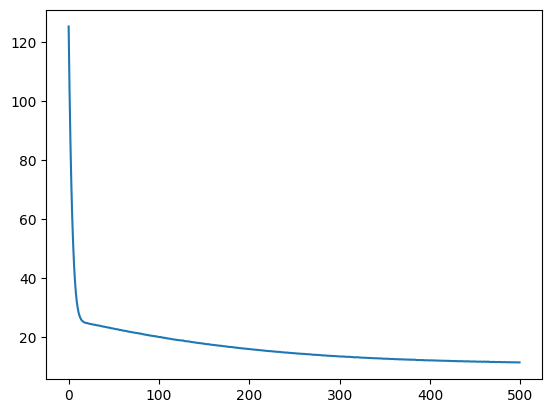

In [53]:
plt.plot(history.history['loss'])

# Question 11

What equation does the model provide for predicting open rate?

In [55]:
model.get_weights()

[array([[0.7572335]], dtype=float32), array([6.9946795], dtype=float32)]

In [57]:
#y = w0+w1*x
w0 =model.get_weights()[1]
w1 =model.get_weights()[0]

print('equation: open_rate = %.2f + %.2f * savings_pct'%(w0,w1))

equation: open_rate = 6.99 + 0.76 * savings_pct


<ipython-input-57-906360b0d0cf>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('equation: open_rate = %.2f + %.2f * savings_pct'%(w0,w1))


In [58]:
x[0:2]

array([[32],
       [25]])

In [59]:
y[0:2]

array([[34],
       [31]])

In [60]:
y_pred = w0+w1*x

In [61]:
y_pred[0:3]

array([[31.22615147],
       [25.92551696],
       [19.86764896]])

# Question 12

Now, let's repeat the whole exercise, but add `coupon_or_discount` as our second predictor. To start, create a scatterplot of `savings_pct` vs `open_rate` with each dot a different colour depending on the value of `coupon_or_discount`.

<Axes: xlabel='savings_pct', ylabel='open_rate'>

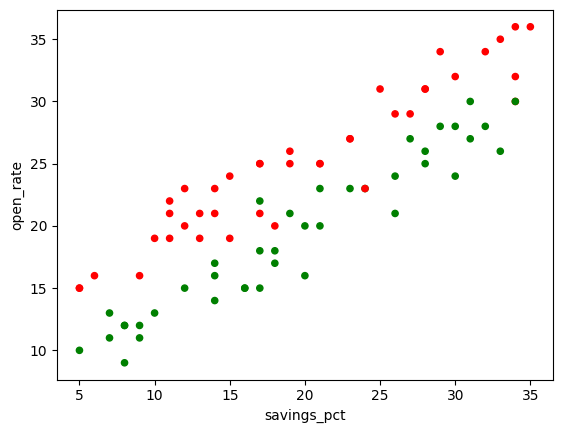

In [62]:
df.plot(
    kind='scatter',
    x='savings_pct',
    y='open_rate',
    c=df['coupon_or_discount'].apply(lambda coupon_or_discount: 'red' if coupon_or_discount else 'green'))

# Question 13

 Recreate `x` to include both `savings_pct` and `coupon_or_discount`.

In [63]:
x = df[['savings_pct','coupon_or_discount']].to_numpy()
x[0:4]

array([[32,  1],
       [25,  1],
       [17,  1],
       [19,  1]])

In [64]:
y[0:4]

array([[34],
       [31],
       [25],
       [25]])

# Question 14

Redefine `input`, `linear_regression`, and `model` to accomodate our new predictor.

In [65]:
input = keras.Input(shape=(2))
linear_regression = keras.layers.Dense(1)(input)
model = keras.Model(inputs=input, outputs=linear_regression)

# Question 15

Compile the new model and train it for 500 epochs on a batch size of 1. Make sure to save the model history: we'll use it in the next question.

In [66]:
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(x,y,batch_size=1, epochs=500)

Epoch 1/500
80/80 [==============================] - 1s 2ms/step - loss: 898.4927
Epoch 2/500
80/80 [==============================] - 0s 2ms/step - loss: 814.1642
Epoch 3/500
80/80 [==============================] - 0s 2ms/step - loss: 735.2327
Epoch 4/500
80/80 [==============================] - 0s 2ms/step - loss: 662.1927
Epoch 5/500
80/80 [==============================] - 0s 2ms/step - loss: 594.5715
Epoch 6/500
80/80 [==============================] - 0s 2ms/step - loss: 532.1703
Epoch 7/500
80/80 [==============================] - 0s 2ms/step - loss: 474.9153
Epoch 8/500
80/80 [==============================] - 0s 2ms/step - loss: 422.5377
Epoch 9/500
80/80 [==============================] - 0s 3ms/step - loss: 374.3513
Epoch 10/500
80/80 [==============================] - 0s 3ms/step - loss: 330.9996
Epoch 11/500
80/80 [==============================] - 0s 4ms/step - loss: 291.4207
Epoch 12/500
80/80 [==============================] - 0s 3ms/step - loss: 255.7014
Epoch 13/500


# Question 16

Use the training history to plot how the loss function changed over each training epoch.

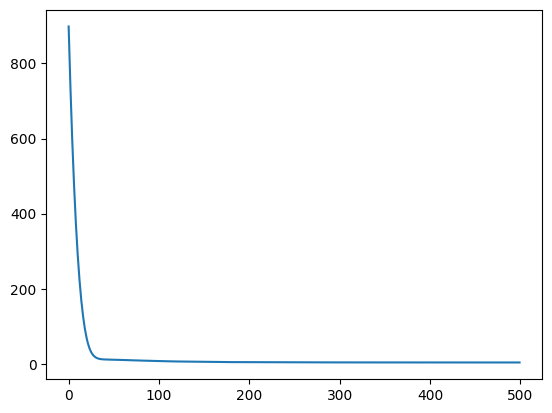

In [67]:
plt.plot(history.history['loss'])

# Question 17

What equation does the model provide for predicting open rate?

In [68]:
model.get_weights()

[array([[0.6798745],
        [5.60591  ]], dtype=float32),
 array([6.001698], dtype=float32)]

In [70]:
w0 = model.get_weights()[1]
w1 = model.get_weights()[0][0]
w2 = model.get_weights()[0][1]

print(" equation: open_rate = %.2f + %.2f * savings_pct + %.2f * coupon_or_discount"%(w0,w1,w2))

 equation: open_rate = 6.00 + 0.68 * savings_pct + 5.61 * coupon_or_discount


<ipython-input-70-ad551a37b89a>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(" equation: open_rate = %.2f + %.2f * savings_pct + %.2f * coupon_or_discount"%(w0,w1,w2))


In [71]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [72]:
y_pred = w0 + np.dot(x, [w1,w2])

In [73]:
y[0:2]

array([[34],
       [31]])

In [74]:
y_pred[0:2]

array([[33.36359119],
       [28.60446984]])

Hello Professor,
Kindly note that this assignment was done by four members of the group:
Amarachi James,
Emrah Ozdek,
Ifeoma Ihuoma, and
Mamat Jasseh.

Also note that Mary and Shubham did not participate in this assignment.